Must be run with Python 3.7

Calculates the planarity of the molecule by finding the average distance of all the atoms to a plane of best fit

In [1]:
from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d
import math
import cclib
import glob
import numpy as np
import csv

In [3]:
def planarity(list_of_points):
    points = Points(list_of_points)
    plane = Plane.best_fit(points)

    #To plot plane in 3D
    plot_3d(
        points.plotter(c='red', s=50, depthshade=False),
        plane.plotter(alpha=0.25, lims_x=(-15, 15), lims_y=(-15, 15)),)
    
    x0 = plane.point[0]
    y0 = plane.point[1]
    z0 = plane.point[2]
    A = plane.vector[0]
    B = plane.vector[1]
    C = plane.vector[2]

    distances = []
    for p in points:
        x1 = p[0]
        y1 = p[1]
        z1 = p[2]

        distance = abs(A*(x1-x0) + B*(y1-y0) + C*(z1-z0))/math.sqrt(A*A + B*B + C*C)
        distances.append(distance)

    sum = 0
    for d in distances:
        sum = d + sum
    planarity = sum / len(distances)
    
    return planarity

1.4318487991277358
2.2643066098323175
1.256875225282211
2.6009844842630474
1.6091598249906134
0.7995479725798659
2.3091828309359537
1.2045012410989113
0.875022315348404
2.1325436169222307


KeyboardInterrupt: 

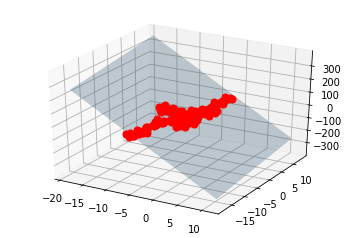

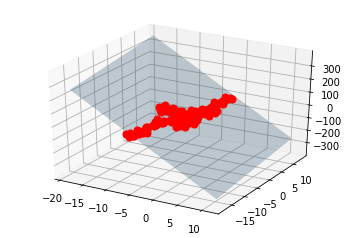

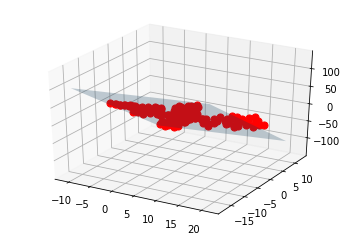

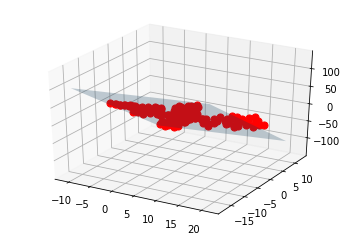

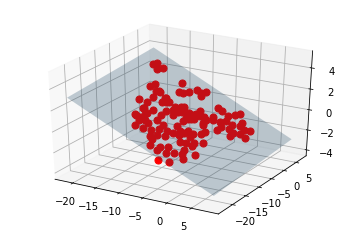

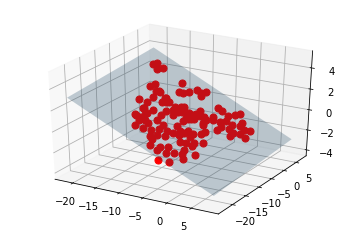

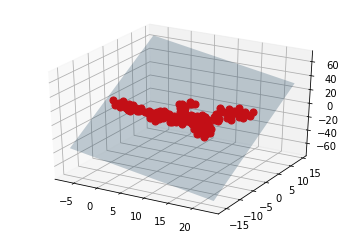

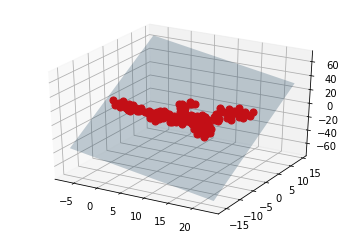

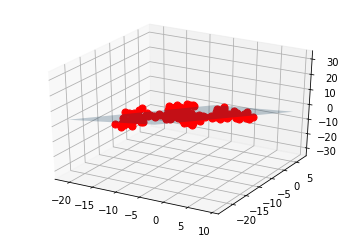

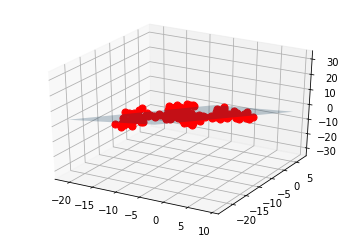

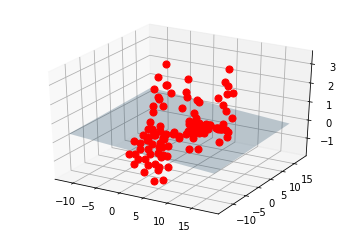

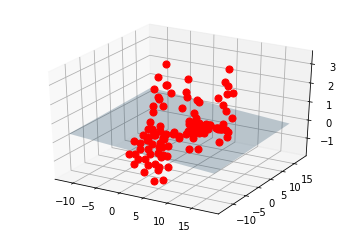

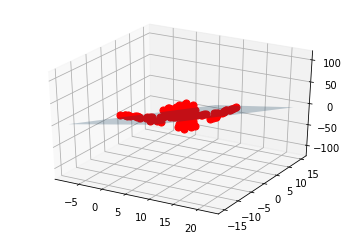

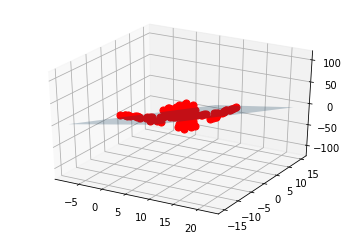

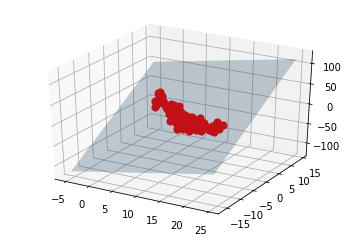

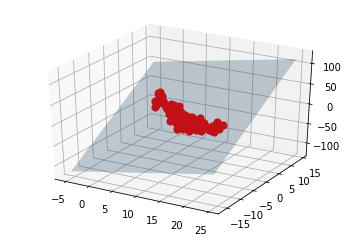

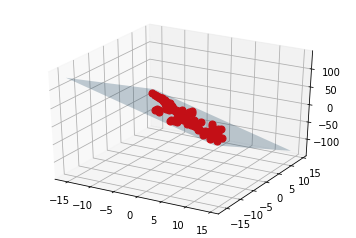

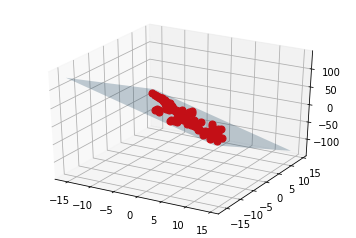

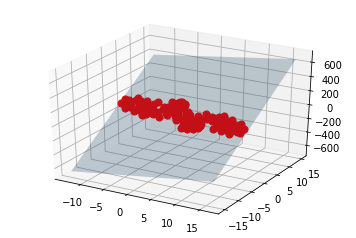

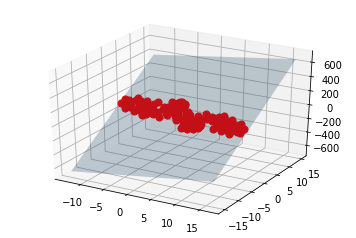

In [4]:
molecule = []
planar = []
for filename in sorted(glob.glob('../output_files/DFT/DFT_acceptors/*.out')):
    myfile = cclib.io.ccopen(filename)
    values = myfile.parse()
    
    coords = values.atomcoords
    rows, cols = (len(coords[-1]), 3)
    arr = []
    for c in range(0, rows):
        row = []
        for j in range(0, cols):
            row.append(coords[-1][c][j])
        row = np.array(row)
        arr.append(row)
            
    arr = np.array(arr)

    filename = filename.rsplit('.',1)[0]
    filename = filename.split('/')[-1]
    molecule.append(filename)
    
    planar.append(planarity(arr))
    print(molecule[-1], planar[-1])

In [4]:
fields = ['Molecule', 'Planarity (Angstrom)']

with open('../data_csv/planarity.csv', "w") as csvoutput:
        writer = csv.DictWriter(csvoutput, fieldnames = fields, lineterminator = '\n')
        writer.writeheader()

        for i in range(len(molecule)):
            dict_temp = {
                'Molecule': molecule[i] ,
                'Planarity (Angstrom)': planar[i]
            }
            writer.writerow(dict_temp)